In [20]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm

import datetime
from dateutil.parser import *

In [216]:
tablica = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/radni_folder/parquet/X.parquet")
tablica = tablica.loc[38]

In [219]:
outlieri.head(5)

,regular_price,discounted_price,number_of_stores,amount,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekend
date,,,,,,,,,,,,
2016-01-02,0.100,0.100,439,769.0,0,0,0,0,0,1,0,1
2016-01-28,0.099,0.099,436,30.0,0,0,0,1,0,0,0,0
2016-02-10,0.100,0.100,436,37.0,0,0,1,0,0,0,0,0
2016-03-11,0.099,0.099,445,38.0,0,0,0,0,1,0,0,0
2016-03-12,0.100,0.100,442,567.0,0,0,0,0,0,1,0,1


In [211]:
tablica['amount'] = np.sqrt(tablica['amount'])

In [218]:
upper_lim = tablica['amount'].quantile(.95)
lower_lim = tablica['amount'].quantile(.05)
outlieri=tablica[(tablica['amount'] >= upper_lim) | (tablica['amount'] <= lower_lim)]

* tablica _outlieri_ sadrži podatke o outlierima

In [224]:
outlieri.to_csv(r'C:\Users\vvrhovec\Veronika\kodovi\radni_folder\outlieri.csv')

In [4]:
outlieri['godina'] = outlieri.index.get_level_values('date').year
outlieri['mjesec'] = outlieri.index.get_level_values('date').month
outlieri['dan'] = outlieri.index.get_level_values('date').day
outlieri['datum'] = outlieri.index.get_level_values('date')

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [222]:
outlieri = outlieri.drop(['Weekend'],axis = 1)

In [223]:
outlieri.head()

,regular_price,discounted_price,number_of_stores,amount
date,,,,
2016-01-02,0.100,0.100,439,769.0
2016-01-28,0.099,0.099,436,30.0
2016-02-10,0.100,0.100,436,37.0
2016-03-11,0.099,0.099,445,38.0
2016-03-12,0.100,0.100,442,567.0


In [13]:
"""brojac = 0
for i in range (0,outlieri.shape[0]-1):
    for j in range (i,outlieri.shape[0]):
        if ((outlieri.iloc[i][1] == outlieri.iloc[j][1]) & (outlieri.iloc[i][2] == outlieri.iloc[j][2])):
            brojac += 1
            print (outlieri.iloc[i][2], outlieri.iloc[i][1])        
print ("istih datuma ima: ", brojac)"""

'brojac = 0\nfor i in range (0,outlieri.shape[0]-1):\n    for j in range (i,outlieri.shape[0]):\n        if ((outlieri.iloc[i][1] == outlieri.iloc[j][1]) & (outlieri.iloc[i][2] == outlieri.iloc[j][2])):\n            brojac += 1\n            print (outlieri.iloc[i][2], outlieri.iloc[i][1])        \nprint ("istih datuma ima: ", brojac)'

--- outlieri se pojavljuju nasumice, nema nekog dana u godini kad je primijećen značajan broj outliera

In [14]:
amount = np.sort(tablica['amount'])

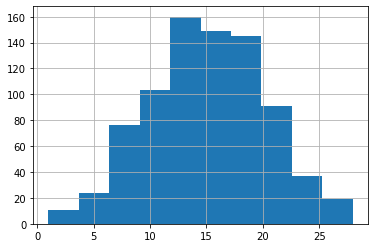

In [67]:
tablica['amount'].hist()

U ovoj bilježnici sam korijenovala stupac 'amount' jer bi niz sqrt(amount) mogao biti normalno distribuiran.
<br>Također sam zadala da su outlieri oni podaci koji su od aritm.sredine korijenovanog niza udaljeni za više od dvije standardne devijacije. 

In [68]:
from sklearn.pipeline import Pipeline
from transformers import dayName, dummy_days, DFStandardScaler, ZeroFillTransformer, DFFeatureUnion

In [69]:
tablica.head()

,regular_price,discounted_price,number_of_stores,amount
date,,,,
2016-01-02,0.1,0.1,439,27.730849
2016-01-03,0.1,0.1,436,10.000000
2016-01-04,0.1,0.1,441,17.464249
2016-01-05,0.1,0.1,441,8.888194
2016-01-06,0.1,0.1,444,18.547237


In [86]:
def removing_outliers(self):
    upper_lim = self['amount'].mean()+np.std(self['amount'])
    lower_lim = self['amount'].mean()-np.std(self['amount'])
    self=self[(self['amount'] < upper_lim) & (self['amount'] > lower_lim)]
    return self

In [71]:
def X_train_test_separation(self):
    aux = self.loc[self.index.get_level_values('date') <= '2018-01-01']
    train = aux.drop('amount',axis=1)
    
    aux = self.loc[self.index.get_level_values('date') > '2018-01-01']
    test = aux.drop('amount',axis=1)
    
    return train, test

In [72]:
def y_train_test_separation(self):
    aux = self.loc[self.index.get_level_values('date') <= '2018-01-01']
    train = aux['amount']
    
    aux = self.loc[self.index.get_level_values('date') > '2018-01-01']
    test = aux['amount']
    
    return train, test

In [73]:
std_scaler = StandardScaler()
lm = linear_model.LinearRegression()

In [74]:
list_of_items = [38,39,40,41,57] 

In [75]:
rmse_train = []
rmse_test = []
r2 = []

In [76]:
categorical_features = ['day_of_week']
numerical_features = ['regular_price', 'discounted_price','number_of_stores']

In [77]:
pipeline = Pipeline([ ('features', DFFeatureUnion([       
                                                      ('categoricals', Pipeline([ ('dani',dayName()), ('dummyD', dummy_days())]))
                                                  ])), 
                      ('scaler', DFStandardScaler()) 
                   ])

In [89]:
tablica = removing_outliers(tablica)

In [90]:
tablica.describe()

,regular_price,discounted_price,number_of_stores,amount
count,549.000000,549.000000,549.000000,549.000000
mean,0.099978,0.099978,420.216758,15.256740
std,0.000146,0.000146,21.464842,2.841080
min,0.099000,0.099000,368.000000,9.949874
25%,0.100000,0.100000,402.000000,12.845233
50%,0.100000,0.100000,419.000000,15.231546
75%,0.100000,0.100000,441.000000,17.663522
max,0.100000,0.100000,450.000000,20.223748


### 1.1.2. Separating data into training and test set

In [91]:
tablica_train, tablica_test =  X_train_test_separation(tablica)
y_train, y_test =  y_train_test_separation(tablica)

### 1.1.3. Pipeline

In [92]:
tablica_train = pipeline.fit_transform(tablica_train)
tablica_test = pipeline.transform(tablica_test)

In [93]:
print (tablica_train.shape, y_train.shape)
print (tablica_test.shape, y_test.shape)

(462, 10) (462,)
(87, 10) (87,)


## 1.2. Fitting and transforming

### 1.2.1. Training set

In [94]:
model = lm.fit(tablica_train, y_train)

In [95]:
y_train_predicted = model.predict(tablica_train)

In [96]:
model.score(tablica_train,y_train)

0.11709160578513733

In [97]:
mae_train = mean_absolute_error(y_train**2, y_train_predicted)
mae_train

226.6849844647478

In [98]:
mse_train = mean_squared_error(y_train**2, y_train_predicted)
mse_train

58851.016481389954

In [99]:
rmse_tr = np.sqrt(mean_squared_error(y_train**2, y_train_predicted))
rmse_train.append(rmse_tr)
rmse_train

[242.5922844638509]

### 1.2.2. Test set

In [100]:
y_test_predicted = model.predict(tablica_test)

In [101]:
mae_test = mean_absolute_error(y_test**2, y_test_predicted)
mae_test

219.97817596254603

In [102]:
mse_test = mean_squared_error(y_test**2, y_test_predicted)
mse_test

55964.85863977714

Text(0, 0.5, 'predicted amount sold')

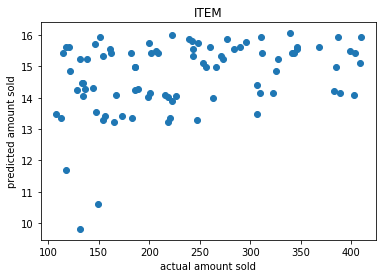

In [103]:
plt.scatter(y_test**2, y_test_predicted)
plt.title("ITEM")
plt.xlabel("actual amount sold")
plt.ylabel("predicted amount sold")

## 1.3. Error metrics

In [104]:
r2_score(y_test**2,y_test_predicted)

-6.322738760078765

In [105]:
r2.append(r2_score(y_test**2,y_test_predicted))

In [106]:
rmse_te = np.sqrt(mean_squared_error(y_test**2, y_test_predicted))
rmse_test.append(rmse_te)
rmse_test

[236.56892999668648]

Zapravo imamo značajno lošije rezultate nego kad smo se outliera riješavali iz niza 'amount'.

In [183]:
tablica = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/radni_folder/parquet/X_prices_stores_amount.parquet")
tablica = tablica.loc[38]

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [161]:
tablica.head(15)

,regular_price,discounted_price,number_of_stores,amount
date,,,,
2016-01-02,0.1,0.1,439,769.0
2016-01-03,0.1,0.1,436,100.0
2016-01-04,0.1,0.1,441,305.0
2016-01-05,0.1,0.1,441,79.0
2016-01-06,0.1,0.1,444,344.0
2016-01-07,0.1,0.1,441,97.0
2016-01-08,0.1,0.1,442,311.0
2016-01-09,0.1,0.1,443,541.0
2016-01-10,0.1,0.1,441,94.0


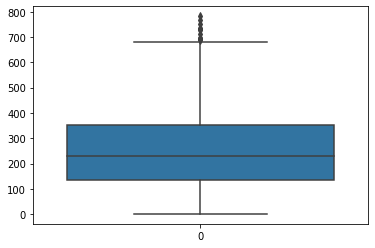

In [159]:
sns.boxplot(data=tablica['amount'])

In [138]:
tablica['amount'] = np.log(tablica['amount'])

In [139]:
tablica = removing_outliers(tablica)

In [140]:
tablica.describe()

,regular_price,discounted_price,number_of_stores,amount
count,615.000000,615.000000,615.000000,615.000000
mean,0.099974,0.099974,419.674797,5.421321
std,0.000159,0.000159,21.706172,0.439135
min,0.099000,0.099000,368.000000,4.430817
25%,0.100000,0.100000,401.000000,5.078289
50%,0.100000,0.100000,419.000000,5.463832
75%,0.100000,0.100000,441.000000,5.803627
max,0.100000,0.100000,450.000000,6.126869


### 1.1.2. Separating data into training and test set

In [141]:
tablica_train, tablica_test =  X_train_test_separation(tablica)
y_train, y_test =  y_train_test_separation(tablica)

### 1.1.3. Pipeline

In [142]:
tablica_train = pipeline.fit_transform(tablica_train)
tablica_test = pipeline.transform(tablica_test)

In [143]:
print (tablica_train.shape, y_train.shape)
print (tablica_test.shape, y_test.shape)

(513, 10) (513,)
(102, 10) (102,)


## 1.2. Fitting and transforming

### 1.2.1. Training set

In [144]:
model = lm.fit(tablica_train, y_train)

In [145]:
y_train_predicted = model.predict(tablica_train)

In [146]:
model.score(tablica_train,y_train)

0.14651350498280213

In [147]:
mae_train = mean_absolute_error(np.exp(y_train), y_train_predicted)
mae_train

242.36888801146142

In [148]:
mse_train = mean_squared_error(np.exp(y_train), y_train_predicted)
mse_train

68609.88390214776

In [149]:
rmse_tr = np.sqrt(mean_squared_error(np.exp(y_train), y_train_predicted))
rmse_train.append(rmse_tr)
rmse_train

[242.5922844638509, 24.613954430547167, 261.9348848514603]

### 1.2.2. Test set

In [150]:
y_test_predicted = model.predict(tablica_test)

In [151]:
mae_test = mean_absolute_error(np.exp(y_test), y_test_predicted)
mae_test

241.22912345249452

In [152]:
mse_test = mean_squared_error(np.exp(y_test), y_test_predicted)
mse_test

69297.40673843618

Text(0, 0.5, 'predicted amount sold')

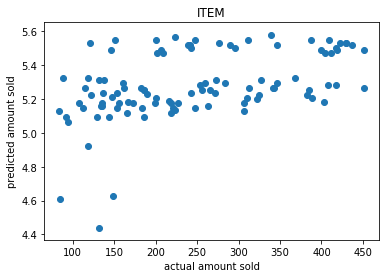

In [153]:
plt.scatter(np.exp(y_test), y_test_predicted)
plt.title("ITEM")
plt.xlabel("actual amount sold")
plt.ylabel("predicted amount sold")

## 1.3. Error metrics

In [154]:
r2_score(np.exp(y_test),y_test_predicted)

-5.228708726419304

In [155]:
r2.append(r2_score(np.exp(y_test),y_test_predicted))

In [156]:
rmse_te = np.sqrt(mean_squared_error(np.exp(y_test), y_test_predicted))
rmse_test.append(rmse_te)
rmse_test

[236.56892999668648, 24.65251384824966, 263.24400608263846, 263.24400608263846]

Izbacujemo podatke koji se ne nalaze između gornjeg i donjeg brka.

In [160]:
def removing_outliers(self):
    iqr = self['amount'].quantile(0.75) - self['amount'].quantile(0.25)
    upper_lim = self['amount'].quantile(0.75) + 1.5*iqr
    lower_lim = self['amount'].quantile(0.25) - 1.5*iqr
    self=self[(self['amount'] < upper_lim) & (self['amount'] > lower_lim)]
    return self

In [162]:
tablica = removing_outliers(tablica)

In [163]:
tablica.describe()

,regular_price,discounted_price,number_of_stores,amount
count,803.000000,803.000000,803.000000,803.000000
mean,0.099818,0.099818,420.526775,246.876712
std,0.001935,0.001935,21.786489,147.069583
min,0.049000,0.049000,368.000000,1.000000
25%,0.100000,0.100000,402.000000,132.500000
50%,0.100000,0.100000,420.000000,226.000000
75%,0.100000,0.100000,442.000000,346.000000
max,0.103000,0.103000,452.000000,679.000000


### 1.1.2. Separating data into training and test set

In [164]:
tablica_train, tablica_test =  X_train_test_separation(tablica)
y_train, y_test =  y_train_test_separation(tablica)

### 1.1.3. Pipeline

In [165]:
tablica_train = pipeline.fit_transform(tablica_train)
tablica_test = pipeline.transform(tablica_test)

In [166]:
print (tablica_train.shape, y_train.shape)
print (tablica_test.shape, y_test.shape)

(675, 10) (675,)
(128, 10) (128,)


## 1.2. Fitting and transforming

### 1.2.1. Training set

In [167]:
model = lm.fit(tablica_train, y_train)

In [168]:
y_train_predicted = model.predict(tablica_train)

In [169]:
model.score(tablica_train,y_train)

0.1869814111500786

In [173]:
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_train

105.44501501217935

In [174]:
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_train

17330.293365773417

In [175]:
rmse_tr = np.sqrt(mean_squared_error(y_train, y_train_predicted))
rmse_train.append(rmse_tr)
rmse_train

[242.5922844638509,
 24.613954430547167,
 261.9348848514603,
 inf,
 131.6445721090445]

### 1.2.2. Test set

In [176]:
y_test_predicted = model.predict(tablica_test)

In [177]:
mae_test = mean_absolute_error(y_test, y_test_predicted)
mae_test

122.77679981922194

In [178]:
mse_test = mean_squared_error(y_test, y_test_predicted)
mse_test

48633.24309827794

Text(0, 0.5, 'predicted amount sold')

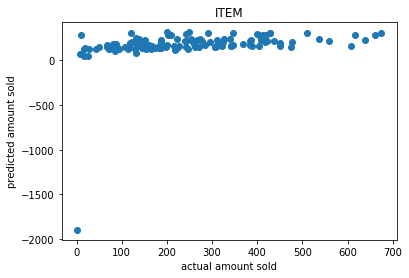

In [179]:
plt.scatter(y_test, y_test_predicted)
plt.title("ITEM")
plt.xlabel("actual amount sold")
plt.ylabel("predicted amount sold")

## 1.3. Error metrics

In [180]:
r2_score(y_test,y_test_predicted)

-1.1041126612490095

In [181]:
r2.append(r2_score(y_test,y_test_predicted))

In [182]:
rmse_te = np.sqrt(mean_squared_error(y_test, y_test_predicted))
rmse_test.append(rmse_te)
rmse_test

[236.56892999668648,
 24.65251384824966,
 263.24400608263846,
 263.24400608263846,
 220.52946083976613]

## DBScan Clustering:

In [209]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 30, eps = 20)
clusters = outlier_detection.fit_predict(tablica)
list(clusters).count(-1)

258

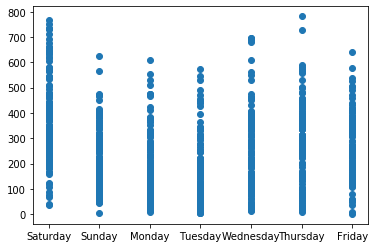

In [187]:
plt.scatter(tablica.index.get_level_values('date').day_name(),tablica['amount'])

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


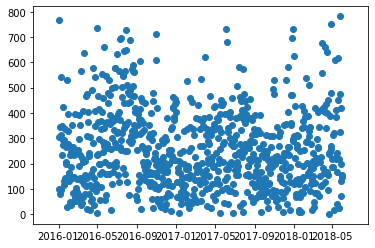

In [188]:
plt.scatter(tablica.index.get_level_values('date'),tablica['amount'])